In [1]:
import matplotlib.pyplot as py
import math as m
import parkyzeClass as pc
import numpy as np
import shapely.geometry
import random
import signal
import modele as md

In [2]:
espace = pc.EspaceDeTravail([(-20,-70), (-20,20), (30,20), (30,-70), (-20,-70)])
rampe = pc.Rampe(14, 5, [-25,10], 0, 2)
parking = pc.Parking(rampe, espace)

In [3]:
def affichage(parking):
    for i in (parking.routes+parking.places+[parking.rampe]+[parking.espace]):
        resX = []
        resY = []

        couleur, points = i.color, i.forme
    
        resX, resY = points.exterior.xy
        if type(i) == pc.Route :
            py.fill(resX,resY, color = 'k')
        py.plot(resX,resY, color = couleur)

    resX, resY = espace.forme.exterior.xy
    py.plot(resX,resY, color = espace.color)

    a,b,c,d = pc.camera(espace)
    py.xlim(a,b)
    py.ylim(c,d)
    py.show()
    return 0

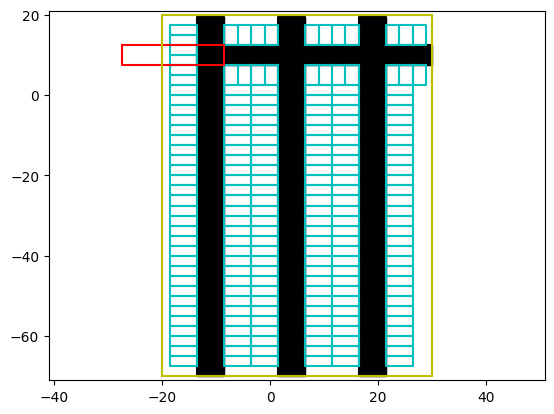

0

In [4]:
md.remplissageAutoParkingStandart1(parking, 5, 5, 2.5)

affichage(parking)

In [5]:
md.remplissageAutoParkingStandart2(parking, 5, 5, 2.5)

affichage(parking)

TypeError: remplissageAutoParkingStandart2() takes 4 positional arguments but 5 were given

Route qui va de [19.0;12.03125] à [19.000000000000004;-62.421875].
Route qui va de [4.0;12.03125] à [4.000000000000004;-62.421875].


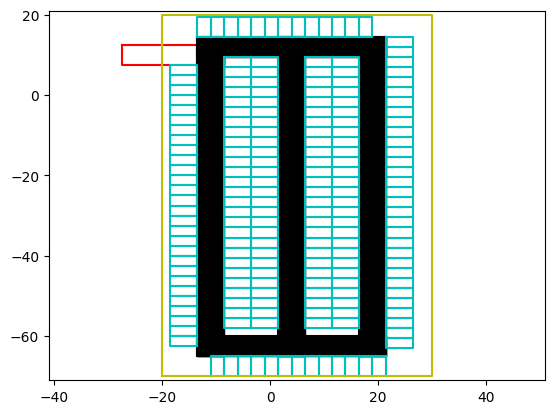

0

In [13]:
parking = md.remplissageAutoParkingStandart3(espace, rampe, 5, 5, 2.5)

affichage(parking)

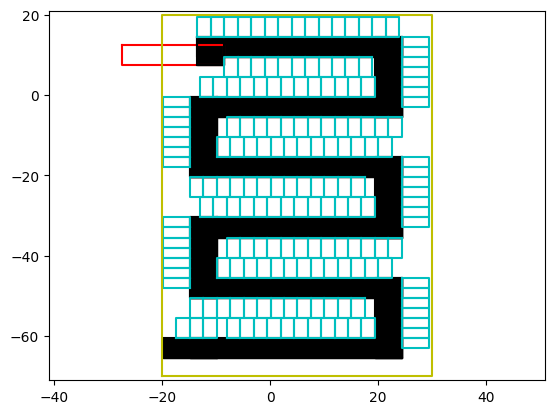

0

In [16]:
parking = md.remplissageAutoParkingStandart4(espace, rampe, 5, 5, 2.5)

affichage(parking)

In [ ]:
listAngle = [0, m.pi/2, -m.pi/2]

def autoRoute(epaisseur, parking, nbRoutes):
    listAvailable = [(0, i) for i in range(3)]

    return autoRouteAux(epaisseur, parking, listAvailable, nbRoutes)

def autoRouteAux(epaisseur, parking, listAvailable, nbRoutes):
    #listAvailable de la forme [(0, 0), (0, 1)]
    if nbRoutes < 1:
        return parking
    longueur = len(listAvailable)
    index = random.randint(0, longueur - 1)
    route, angle = listAvailable[index]
    angle = listAngle[angle]
    a = pc.Route(parking[route], random.random() * 0 + 15, epaisseur, angle, espace)
    if a.valide :
        parking += [a]
        nbRoutes -= 1
        listAvailable.pop(index)
        listAvailable += [(len(parking) - 1, i) for i in range(3)]
        return autoRouteAux(epaisseur, parking, listAvailable, nbRoutes)
    return autoRouteAux(epaisseur, parking, listAvailable, nbRoutes)



In [ ]:
def handler(signum, frame):
   print("Forever is over!")
   raise Exception()

nbLoop = [0 for i in range(200)]
n = 300
nVrai = n


signal.signal(signal.SIGALRM, handler)

for i in range(n):
    signal.alarm(1)
    try :
        print(str(i))
        parking = [pc.Rampe(20, 5, [-25,0], 0, 2)]
        parking = autoRoute(5, parking, 10)
        parking = pc.remplissagePlace(parking, 5, 2.5, espace)
        place = pc.nbPlace(parking)
        nbLoop[place] += 1
    except Exception:
        nVrai -= 1
        pass
signal.alarm(10000)

py.plot(nbLoop)
py.show()
moy = 0
maxi = 0
for i in range(len(nbLoop)):
    if nbLoop[i] == 0 :
        continue
    moy += nbLoop[i]*i/nVrai
    maxi = i

print("\nMoyenne : " + str(moy) + "\nMaximum : " + str(maxi))